### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# look for PROBLEMATIC data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# look for MISSING DATA
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

To start, **time**, **age** and **income** are identified as objects but really should be int64, with time express in hours and income entry replace with its average.

Also, **RestaurantLessThan20** and **Restaurant20To50** and **carryaway** need to be numeric so we will need to average them

For missing data, we can definitely drop **car** column.
Also, I would replace NaN values for  **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20** and **Restaurant20To50** either with average values or the most probable ones (depending on the percentage missing)

But First, let's rename Column 'Y' in 'Coupon Accepter'
                 
      
          

In [7]:
# rename column 'Y' in 'Coupon accepted'
data.rename(columns={'Y': 'Coupon_accepted'}, inplace=True)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
### Make Age numeric ###

# replace 'age' column entries 'below21' with 20 and '50plus' with 51
data['age'].replace(['below21','50plus'],[20,51],inplace=True)
# drop data with no age specified
data.dropna(subset=['age'], inplace=True)
# replace 'age' column entries 'below21' with 20 and '50plus' with 51
data['age'].replace(['below21','50plus'],[20,51],inplace=True)
# convert age entries to int64
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# confirm the change
data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12684 entries, 0 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12684 non-null  int64
dtypes: int64(1)
memory usage: 99.2 KB


In [9]:
### Make Income Numeric and replace the range with the average ###
# Replace "$100000 or more" with "$100000 - $110000"
data['income'].replace('$100000 or More', '$100000 - $110000', inplace=True)
# Replace "Less than $12500" with "$10000 - $12500"
data['income'].replace('Less than $12500','$10000 - $12500', inplace=True)
# Clean up the field from non numeric entries
data['income'] = data['income'].str.replace('$', '')
data['income'] = data['income'].str.replace(',', '')
data['income'] = data['income'].str.replace('-', '')
# Create a list from the original entry
data['income'] = data['income'].str.split()
# For each entry of the income column, cast each value of the list as as int
data['income'] = data['income'].apply(lambda x: [int(y) for y in x])
# For each line of the income, average the two values of the list
data['income'] = data['income'].apply(lambda x: sum(x)/len(x))
# Verify the result
data['income'].tail(10)


<ipython-input-9-3e66f26a05d5>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['income'] = data['income'].str.replace('$', '')


12674    81249.5
12675    81249.5
12676    81249.5
12677    81249.5
12678    81249.5
12679    81249.5
12680    81249.5
12681    81249.5
12682    81249.5
12683    81249.5
Name: income, dtype: float64

In [10]:
### Convert time to 24h format adding 12 whenever there is PM to start with ###
# Replace "AM" with ""
data['time'] = data['time'].str.replace('AM', '')
# Replace "PM" with "12"
data['time'] = data['time'].str.replace('PM',' 12')
# Split
data['time'] = data['time'].str.split()
# For each entry of the time column, cast each value of the list as as int
data['time'] = data['time'].apply(lambda x: [int(y) for y in x])
# For each line of the time, sum the two values of the list
data['time'] = data['time'].apply(lambda x: sum(x))
# Verify the result
data['time'].tail(20)

12664    22
12665    10
12666    14
12667    10
12668    10
12669    10
12670    18
12671    10
12672    18
12673    18
12674    22
12675    22
12676    18
12677    18
12678    22
12679    18
12680     7
12681     7
12682     7
12683     7
Name: time, dtype: int64

In [11]:
# Count different values of expiration column
data['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

There are anly two values for the Coupon Expiration time, so no need for additional transformations

Now let's address the NaN problem Filling missing numbers with most popular outcome of the column we are working on.

In [12]:

data['RestaurantLessThan20'].head()
print(data['RestaurantLessThan20'].value_counts())
print('-------------')
print("Missing Values")
print(data['RestaurantLessThan20'].isna().sum())
print("Filling missing numbers with most popular outcome")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')


1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64
-------------
Missing Values
130
Filling missing numbers with most popular outcome


In [13]:
data['Restaurant20To50'].head()
print(data['Restaurant20To50'].value_counts())
print('-------------')
print("Missing Values")
print(data['Restaurant20To50'].isna().sum())
print("Filling missing numbers with most popular outcome")
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64
-------------
Missing Values
189
Filling missing numbers with most popular outcome


In [14]:
data['CarryAway'].tail(34)
print(data['CarryAway'].value_counts())
print('-------------')
print("Missing Values")
print(data['CarryAway'].isna().sum())
print("Filling missing numbers with most popular outcome")
data['CarryAway'] = data['CarryAway'].fillna('1~3')

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
-------------
Missing Values
151
Filling missing numbers with most popular outcome


In [15]:
print(data['CoffeeHouse'].value_counts())
print('-------------')
print("Missing Values")
print(data['CoffeeHouse'].isna().sum())
print("Filling missing numbers with most popular outcome")
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
-------------
Missing Values
217
Filling missing numbers with most popular outcome


In [16]:
print("Distribution of different values for column Bar:")
print(data['Bar'].value_counts())
print('-------------')
print("Missing Values")
print(data['Bar'].isna().sum())
print("Filling missing numbers with most popular outcome")
data['Bar'] = data['Bar'].fillna('never')

Distribution of different values for column Bar:
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
-------------
Missing Values
107
Filling missing numbers with most popular outcome


In [17]:
# Finally, drop the car column
data.drop('car', axis=1, inplace=True)

In [18]:
# Verify that every field has the same number of non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  int64  
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  float64
 14  Bar                   12684 non-null  object 
 15  CoffeeHouse        

4. What proportion of the total observations chose to accept the coupon?



In [19]:
# proportion of the total observations that accepted the coupon

data['Coupon_accepted'].value_counts()[1] / len(data)


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

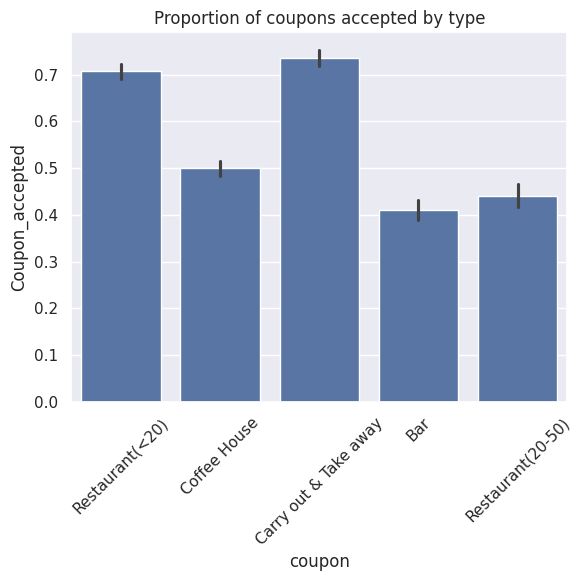

In [86]:
# visualize coupon Column via bar plot

sns.set_theme()
sns.barplot(x = 'coupon', y = 'Coupon_accepted', data = data)
plt.title('Proportion of coupons accepted by type')
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

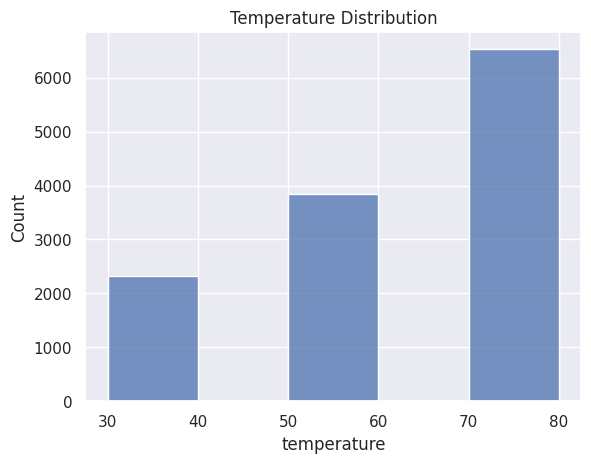

In [87]:
# Use histogram to visualize temperature column

import matplotlib.pyplot as plt
sns.histplot(data['temperature'], bins=5)
plt.title('Temperature Distribution')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
# Create a new DataFrame that contains just the bar coupons.
bar_data = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [23]:
# proportion of the bar coupons accepted compaed to the total coupons
bar_data['Coupon_accepted'].value_counts()[1] / len(data)

0.065200252286345

In [24]:
# proportion of the bar coupons accepted compared to the total bar coupons.
bar_data['Coupon_accepted'].value_counts()[1] / len(bar_data)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


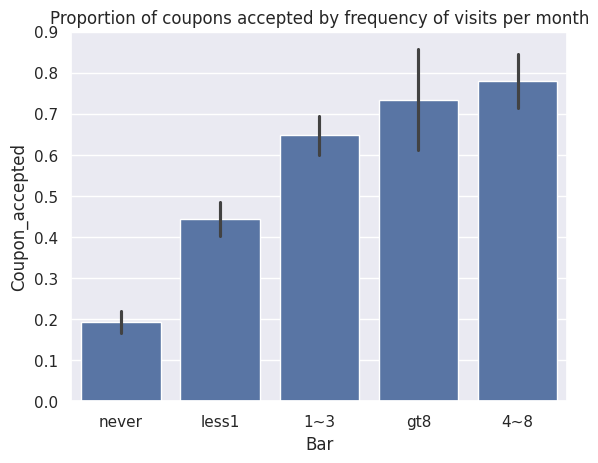

In [88]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
sns.barplot(x = 'Bar', y = 'Coupon_accepted', data = bar_data)
plt.title('Proportion of coupons accepted by frequency of visits per month')
plt.show()


The above chart shows that people that go to the Bar more than 3 times per month tend to accept coupons more ofen than the ones going there 3 or less times.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Compare the acceptance rate between those over the age of 25 who went to a bar 3 or fewer times a month to those who went more.

# Calculate total number of customers age > 25 that were offered the 'Bar' coupon
Total = len(bar_data.query('age>25'))

#Calculate total number of customers age > 25 that took the coopon and went to the Bar n times in a month
Oneto3 = (((bar_data.query('age>25')).query('Coupon_accepted==1'))['Bar'].str.contains("1~3")).values.sum()
less1 = (((bar_data.query('age>25')).query('Coupon_accepted==1'))['Bar'].str.contains("less1")).values.sum()
never = (((bar_data.query('age>25')).query('Coupon_accepted==1'))['Bar'].str.contains("never")).values.sum()

# Acceptance of the Bar coupon for customers age > 25 based on the frequency they go to the bar:
few_visits = (Oneto3+less1+never)/len(bar_data.query('age>25'))
more_visits = (Total-Oneto3-less1-never)/len(bar_data.query('age>25'))
print(few_visits, more_visits)



0.3139458030403173 0.6860541969596827


Interestingly, for folks age greather than 25 who are offered a coupon for a Bar, the acceptance rate for such population that goes to bar often (more than 3 times/month) is more than double compared to the acceptance of folks age 25 and older that go to Bar less often (3 times or less per month).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


First let's check up the categories we have in the 'passenger' and 'occupation' column.

In [27]:
bar_data["passanger"].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64

In [28]:
bar_data["occupation"].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [29]:
# The previous approach is hard to replicate.
# I will create a helper function to filter all the conditions:

def helper(data_set):
    if data_set['Bar'] in ['1~3', 'gt8', '4~8'] and data_set['passanger'] not in ['Alone','Kid(s)'] and data_set['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0

# Let's create a new column based on the function above
bar_data['passenger_job_frequency'] = bar_data.apply(helper, axis=1)

# Let's validate the outcome whether it works based on the conditions applied
bar_data[['Bar','passanger','occupation','passenger_job_frequency']].head(15)


<ipython-input-29-72d29656adea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['passenger_job_frequency'] = bar_data.apply(helper, axis=1)


,Bar,passanger,occupation,passenger_job_frequency
9,never,Kid(s),Unemployed,0
13,never,Alone,Unemployed,0
17,never,Alone,Unemployed,0
24,never,Friend(s),Architecture & Engineering,0
35,never,Alone,Architecture & Engineering,0
39,never,Alone,Architecture & Engineering,0
46,never,Friend(s),Student,0
57,never,Alone,Student,0
61,never,Alone,Student,0
75,less1,Kid(s),Education&Training&Library,0


In [30]:
# Now lets calculate the acceptance rate for people that accepted the coupon
# and meet the requirements above:
acceptance = bar_data.query("passenger_job_frequency == 1")['Coupon_accepted'].value_counts()[1]/bar_data.query("passenger_job_frequency == 1")['Coupon_accepted'].count()
print(acceptance)


0.717948717948718


Data show that Bar's coupon acceptance for people that go to a Bar more than once per month and were offered the coupon while driving with other adults and not working in the Farming Fishing industry is quite high at 71.79%.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
# For acceptance rata of who "go to bars more than once a month, had passengers
# that were not a kid, and were not widowed" we  reuse the stragegy from the
# previous question, but let's see the categories of maritalstatus

bar_data["maritalStatus"].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [32]:
# I will create a helper function to filter all the conditions:

def helper2(data_set):
    if data_set['Bar'] in ['1~3', 'gt8', '4~8'] and data_set['passanger'] not in ['Alone','Kid(s)'] and data_set['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0

# Let's create a new column based on the function above
bar_data['passenger_maritalstate_frequency'] = bar_data.apply(helper2, axis=1)

# Let's validate the outcome whether it works based on the conditions applied
bar_data[['Bar','passanger','maritalStatus','passenger_maritalstate_frequency']].head(15)


<ipython-input-32-7da54fbe9630>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['passenger_maritalstate_frequency'] = bar_data.apply(helper2, axis=1)


,Bar,passanger,maritalStatus,passenger_maritalstate_frequency
9,never,Kid(s),Unmarried partner,0
13,never,Alone,Unmarried partner,0
17,never,Alone,Unmarried partner,0
24,never,Friend(s),Single,0
35,never,Alone,Single,0
39,never,Alone,Single,0
46,never,Friend(s),Single,0
57,never,Alone,Single,0
61,never,Alone,Single,0
75,less1,Kid(s),Married partner,0


In [33]:
# Now lets calculate the acceptance rate for people that accepted the coupon
# and meet the requirements above:
acceptance2 = bar_data.query("passenger_maritalstate_frequency == 1")['Coupon_accepted'].value_counts()[1]/bar_data.query("passenger_maritalstate_frequency == 1")['Coupon_accepted'].count()
print(acceptance2)

0.717948717948718


In [34]:
# for coupon acceptance of people that "go to bars more than once a month and
# are under the age of 30" I will create the function

def helper3(data_set):
    if data_set['Bar'] in ['1~3', 'gt8', '4~8'] and data_set['age'] < 30 and data_set['age'] > 18:
        return 1
    else:
        return 0

# Let's create a new column based on the function above
bar_data['passenger_age_frequency'] = bar_data.apply(helper3, axis=1)

# Let's validate the outcome whether it works based on the conditions applied
bar_data[['Bar','age','passenger_age_frequency']].head(15)

<ipython-input-34-c51ee01b7a45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['passenger_age_frequency'] = bar_data.apply(helper3, axis=1)


,Bar,age,passenger_age_frequency
9,never,21,0
13,never,21,0
17,never,21,0
24,never,21,0
35,never,21,0
39,never,21,0
46,never,46,0
57,never,46,0
61,never,46,0
75,less1,46,0


In [35]:
# Now lets calculate the acceptance rate for people that accepted the coupon
# and meet the requirements above:
acceptance3 = bar_data.query("passenger_age_frequency == 1")['Coupon_accepted'].value_counts()[1]/bar_data.query("passenger_age_frequency == 1")['Coupon_accepted'].count()
print(acceptance3)

0.7217391304347827


In [36]:
# Now lets calculate the acceptance rate for people that accepted the coupon to
# go to cheap restaurants more than 4 times a month and income is less than 50K
# Assuming cheap restaurants is the column Restaurant(<20) then we need to
# create a sub dataset:
cheap_restaurant_data = data[data['coupon'] == 'Restaurant(<20)']
# Verify the number of visits distribution
cheap_restaurant_data['RestaurantLessThan20'].value_counts()


1~3      1184
4~8       800
less1     460
gt8       288
never      54
Name: RestaurantLessThan20, dtype: int64

In [37]:
# Verify the salary distribution
cheap_restaurant_data['income'].value_counts()

31249.5     446
18749.5     400
43749.5     396
105000.0    379
56249.5     354
11250.0     232
93749.5     199
81249.5     192
68749.5     188
Name: income, dtype: int64

In [38]:
# Calculate the acceptance:

def helper4(data_set):
    if data_set['RestaurantLessThan20'] in ['gt8', '4~8'] and data_set['income'] < 50000.0:
        return 1
    else:
        return 0

# Let's create a new column based on the function above
cheap_restaurant_data['frequency_income'] = cheap_restaurant_data.apply(helper4, axis=1)

# Let's validate the outcome whether it works based on the conditions applied
cheap_restaurant_data[['RestaurantLessThan20','income','frequency_income']].head(5)

<ipython-input-38-5460a747f537>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheap_restaurant_data['frequency_income'] = cheap_restaurant_data.apply(helper4, axis=1)


,RestaurantLessThan20,income,frequency_income
0,4~8,43749.5,1
5,4~8,43749.5,1
7,4~8,43749.5,1
10,4~8,43749.5,1
11,4~8,43749.5,1


In [39]:
# Now lets calculate the acceptance rate for people that accepted the coupon
# and meet the requirements above:
acceptance4 = cheap_restaurant_data.query("frequency_income == 1")['Coupon_accepted'].value_counts()[1]/cheap_restaurant_data.query("frequency_income == 1")['Coupon_accepted'].count()
print(acceptance4)

0.7108910891089109


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The acceptance rate of people going to a bar depends on how many times they go to the bar in a month. The more they go, the highest is the acceptance rate.

### Investigate caffee coupons###

Let's explore coupons for Coffee house and try to determine the characteristics of passengers who accept such coupons.  

In [40]:
# Create a new dataframe filtered for coffee house coupon only
coffee_coupons = data.query("coupon == 'Coffee House'")

In [41]:
# Explore few rows to understand what's the data available is:
coffee_coupons.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_accepted
1,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,18,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,18,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
16,Work,Alone,Sunny,55,7,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [42]:
# proportion of the coffee coupons accepted compared to the total coupons
coffee_coupons['Coupon_accepted'].value_counts()[1] / len(data)

0.15728476821192053

In [43]:
# proportion of the coffee coupons accepted compared to the total coffee coupons.
coffee_coupons['Coupon_accepted'].value_counts()[1] / len(coffee_coupons)

0.49924924924924924

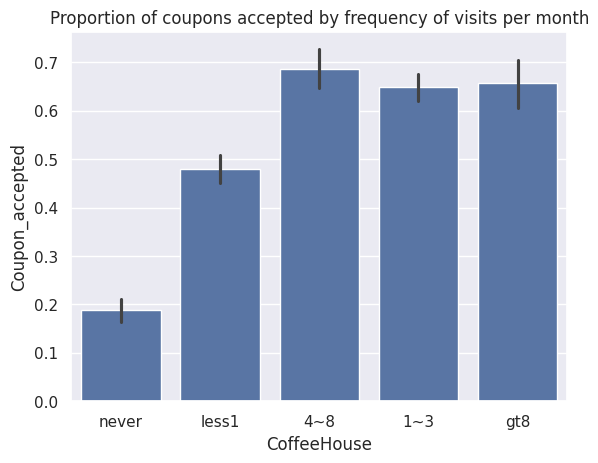

In [84]:
# Compare the acceptance rate as function of monthly visits
sns.barplot(x = 'CoffeeHouse', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by frequency of visits per month')
plt.show()


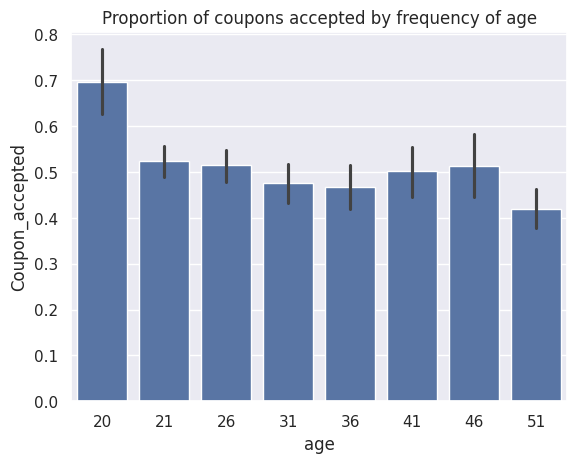

In [83]:
# Compare the acceptance rate as function of age
sns.barplot(x = 'age', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by frequency of age')
plt.show()

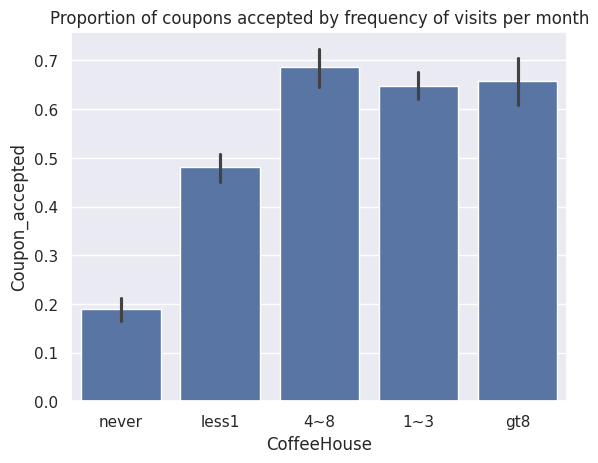

In [82]:
# Compare the acceptance rate as function of monthly visits
sns.barplot(x = 'CoffeeHouse', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by frequency of visits per month')
plt.show()

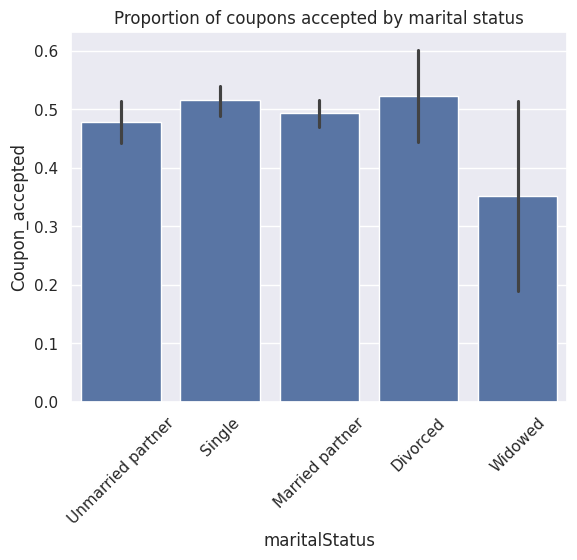

In [77]:

# Compare the acceptance rate as function of Marital status
sns.barplot(x = 'maritalStatus', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by marital status')
plt.xticks(rotation=45)
plt.show()

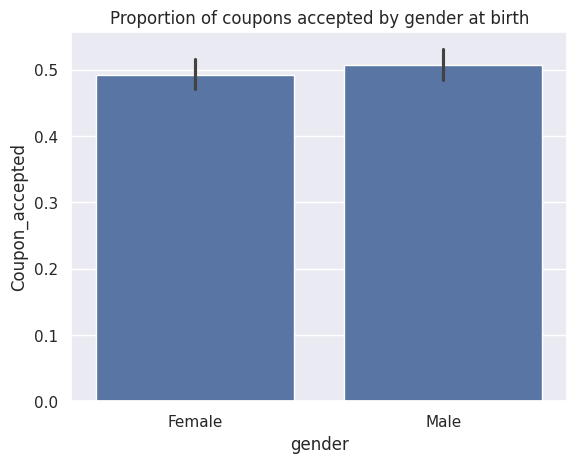

In [81]:
# Compare the acceptance rate as function of gender at birth
sns.barplot(x = 'gender', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by gender at birth')
plt.show()

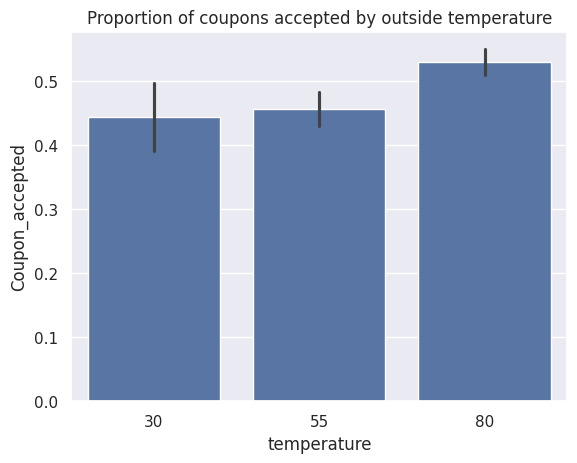

In [80]:
# Compare the acceptance rate as function of Temperature
sns.barplot(x = 'temperature', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted by outside temperature')
plt.show()

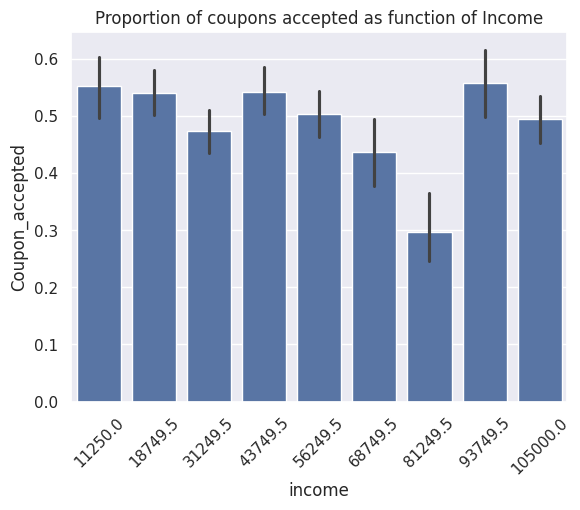

In [91]:
# Compare the acceptance rate as function of Income
sns.barplot(x = 'income', y = 'Coupon_accepted', data = coffee_coupons)
plt.title('Proportion of coupons accepted as function of Income')
plt.xticks(rotation=45)
plt.show()

What this quick overview tell us is that folks with higher probability of accepting coupons are:


*   young folks
*   frequent customers
*   non widowed

and, as common sense could infere, when is hot (80+ degrees) is more likely that coupons are accepted compared to other less hot days


Finally, does not look like there is much correlation of coupon acceptance with income or gender